# Thư viện cần thiết và đọc dữ liệu

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [147]:
data = pd.read_csv("D:/Khoa luan tn/archive/file.csv", index_col='Unnamed: 0')
data.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


Mô tả các cột:

CustomerID: Mã định danh duy nhất cho từng khách hàng.

Gender: Giới tính của khách hàng (ví dụ: Nam, Nữ).

Location: Thông tin về địa điểm hoặc địa chỉ của khách hàng.

Tenure_Months: Số tháng khách hàng được liên kết với nền tảng.

Transaction_ID: Mã định danh duy nhất cho từng giao dịch.

Transaction_Date: Ngày giao dịch.

Product_SKU: Mã định danh Đơn vị lưu kho (SKU) cho sản phẩm.

Product_Description: Mô tả sản phẩm.

Product_Category: Danh mục mà sản phẩm thuộc về.

Quantity: Số lượng sản phẩm đã mua trong giao dịch.

Avg_Price: Giá trung bình của sản phẩm.

Delivery_Charges: Các khoản phí liên quan đến việc giao sản phẩm.

Coupon_Status: Trạng thái của phiếu giảm giá liên quan đến giao dịch.

GST: Thuế hàng hóa và dịch vụ liên quan đến giao dịch.

Date: Ngày giao dịch (có khả năng trùng lặp với Transaction_Date).

Offline_Spend: Số tiền khách hàng chi tiêu ngoại tuyến.

Online_Spend: Số tiền khách hàng chi tiêu trực tuyến.

Month: Tháng giao dịch.

Coupon_Code: Mã liên kết với phiếu giảm giá, nếu có.

Discount_pct: Tỷ lệ phần trăm chiết khấu áp dụng cho giao dịch.

In [148]:
print(f"Có {len(data.columns)} cột trong tập dữ liệu.")
print(f"Có {len(data)} hàng trong tập dữ liệu.")

Có 20 cột trong tập dữ liệu.
Có 52955 hàng trong tập dữ liệu.


In [ ]:
# Thông tin cấu trúc dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52955 entries, 0 to 52954
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  float64
 1   Gender               52924 non-null  object 
 2   Location             52924 non-null  object 
 3   Tenure_Months        52924 non-null  float64
 4   Transaction_ID       52924 non-null  float64
 5   Transaction_Date     52924 non-null  object 
 6   Product_SKU          52924 non-null  object 
 7   Product_Description  52924 non-null  object 
 8   Product_Category     52955 non-null  object 
 9   Quantity             52924 non-null  float64
 10  Avg_Price            52924 non-null  float64
 11  Delivery_Charges     52924 non-null  float64
 12  Coupon_Status        52924 non-null  object 
 13  GST                  52924 non-null  float64
 14  Date                 52924 non-null  object 
 15  Offline_Spend        52924 non-null  floa

# Tiền xử lý

In [150]:
# Xem số lượng dữ liệu thiếu trong mỗi cột
data.isnull().sum()

CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64

Xóa giá trị thiếu

In [151]:
# Xóa 31 giá trị thiếu
data = data[:-31]

In [152]:
data

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,3/10/2019,2500.0,1294.22,3,GC30,30.0
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,3/28/2019,2000.0,1066.12,3,GC30,30.0
52921,16085.0,M,California,15.0,39991.0,2019-10-06,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0
52922,16085.0,M,California,15.0,39991.0,2019-10-06,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0


Thay thế giá trị thiếu

In [153]:
# Không xóa các hàng có giá trị null trong cột "Coupon_Code" và "Discount_pct" vì có thể hiểu rằng đây là những giao dịch diễn ra mà không sử dụng mã giảm giá hoặc mã phiếu giảm giá.
# Điền giá trị thiếu cho Coupon_Code và Discount_pct
data["Coupon_Code"] = data["Coupon_Code"].fillna("No Coupon")
data["Discount_pct"] = data["Discount_pct"].fillna(0)

In [154]:
data.isnull().sum()

CustomerID             0
Gender                 0
Location               0
Tenure_Months          0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
GST                    0
Date                   0
Offline_Spend          0
Online_Spend           0
Month                  0
Coupon_Code            0
Discount_pct           0
dtype: int64

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52924 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  float64
 1   Gender               52924 non-null  object 
 2   Location             52924 non-null  object 
 3   Tenure_Months        52924 non-null  float64
 4   Transaction_ID       52924 non-null  float64
 5   Transaction_Date     52924 non-null  object 
 6   Product_SKU          52924 non-null  object 
 7   Product_Description  52924 non-null  object 
 8   Product_Category     52924 non-null  object 
 9   Quantity             52924 non-null  float64
 10  Avg_Price            52924 non-null  float64
 11  Delivery_Charges     52924 non-null  float64
 12  Coupon_Status        52924 non-null  object 
 13  GST                  52924 non-null  float64
 14  Date                 52924 non-null  object 
 15  Offline_Spend        52924 non-null  floa

In [156]:
# Kiểm tra giá trị 'ngày' trong cột "Transaction_Date" so với 'Date' giống nhau hay không?
data.loc[:, 'Transaction_Date'] = pd.to_datetime(data['Transaction_Date']).dt.strftime('%d-%m-%y')
data.loc[:, 'Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y').dt.strftime('%d-%m-%y')

In [157]:
data.loc[:,'date_match'] = data['Date'] == data['Transaction_Date']
data['date_match'].sum() == len(data)

True

Xóa cột trùng lặp

In [158]:
# Vì giống nhau nên xóa cột "Date"
data = data.drop(columns=['Date','date_match'])

In [159]:
# Thống kê dữ liệu
data.describe()

,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000
mean,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652388,19.802358
std,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333364,8.278878
min,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,0.000000
25%,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


# EDA

In [160]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import calendar
from sklearn.compose import make_column_selector
import warnings
warnings.filterwarnings('ignore')

In [163]:
data['Total Prices']=data['Avg_Price']*data['Quantity']+data.Delivery_Charges
data['Total_Spend']=data['Offline_Spend']+data['Online_Spend']
new = data[['Offline_Spend','Online_Spend','Month','Total_Spend']].groupby('Month').sum()

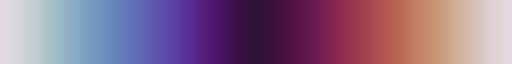

In [180]:
c2

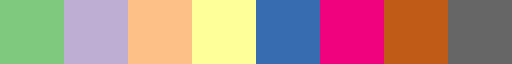

In [187]:
c1

In [195]:
c3 = cm.get_cmap('summer')

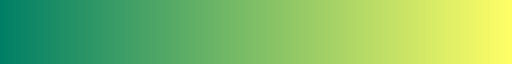

In [196]:
c3

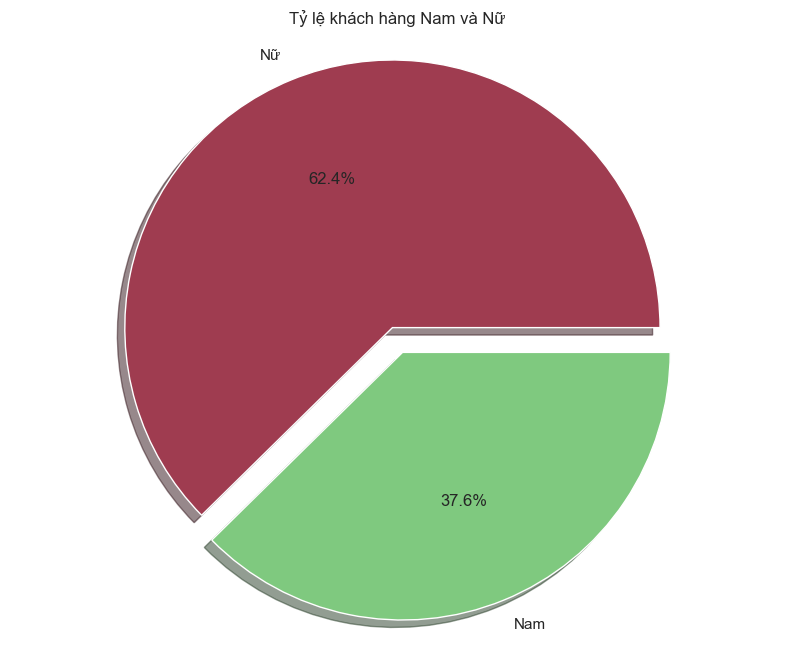

In [ ]:
# Tỷ lệ khách hàng Nam và Nữ
from matplotlib import cm
c1=cm.get_cmap('Accent')
c2=cm.get_cmap('twilight')

val3=data.Gender.value_counts()
plt.pie(val3,labels=['Nữ','Nam'],autopct="%1.1f%%",shadow=True,explode=(0.1,0),colors=[c2(0.7),c1(0.1)])
plt.axis('equal')
plt.title('Tỷ lệ khách hàng Nam và Nữ')
sb.set(style='white')

Text(0.5, 1.0, 'Mức chi tiêu của khách hàng Nam và Nữ')

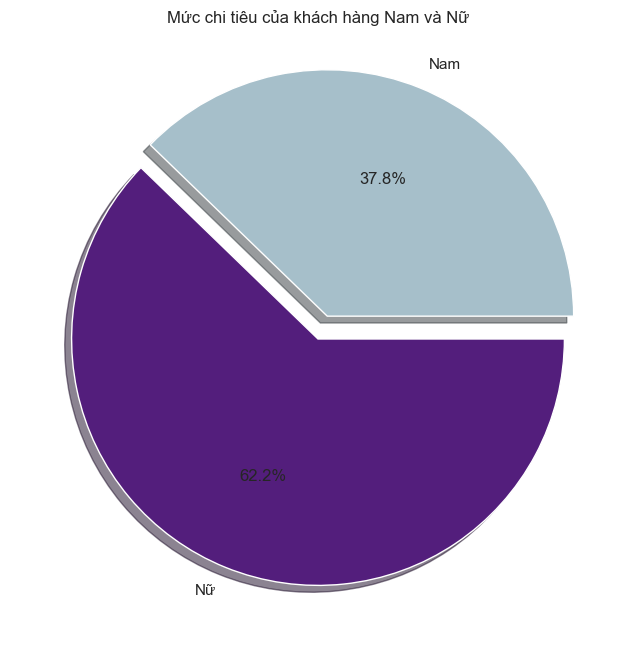

In [ ]:
# Mức chi tiêu của khách hàng Nam và Nữ
male=data[['Total Prices','Gender']].groupby('Gender').get_group('M')['Total Prices'].sum()
female=data[['Total Prices','Gender']].groupby('Gender').get_group('F')['Total Prices'].sum()
sizes=[round(male),round(female)]
labels=['Nam','Nữ']
plt.pie(sizes,autopct='%1.1f%%',labels=[f'{label}' for label, size in zip(labels, sizes)],shadow=True,explode=(0.1,0),colors=[c2(0.1),c2(0.4)])
plt.title('Mức chi tiêu của khách hàng Nam và Nữ')

Text(0.5, 1.0, 'Số lượng khách hàng theo địa điểm')

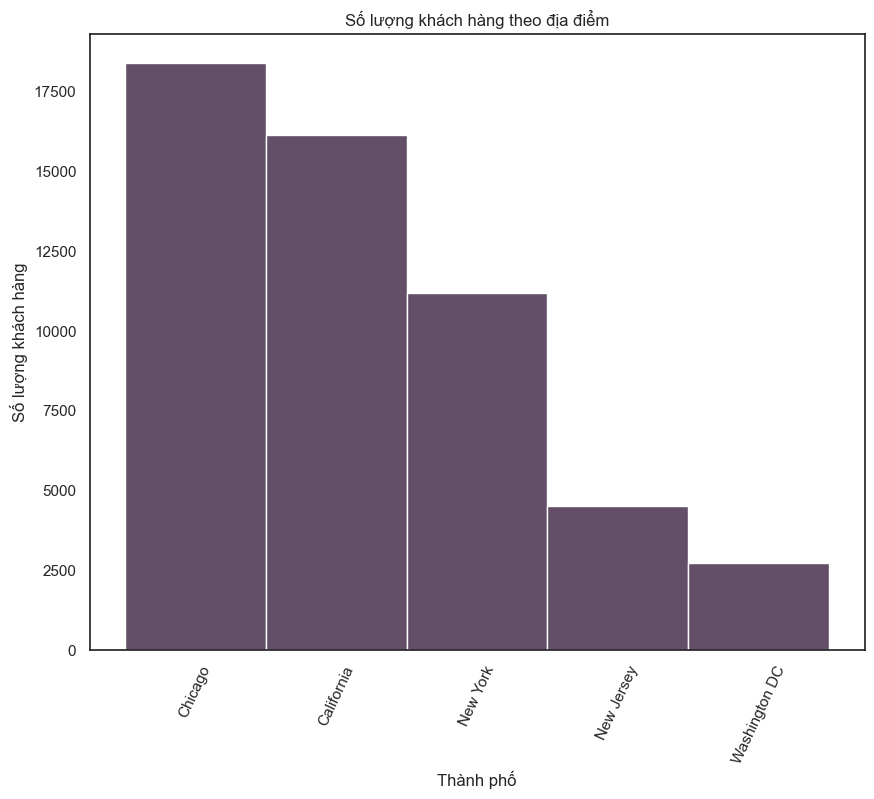

In [168]:
sb.histplot(data.Location,color=c2(0.5))
plt.ylabel('Số lượng khách hàng')
plt.xlabel('Thành phố')
plt.xticks(rotation=65)
plt.title('Số lượng khách hàng theo địa điểm')

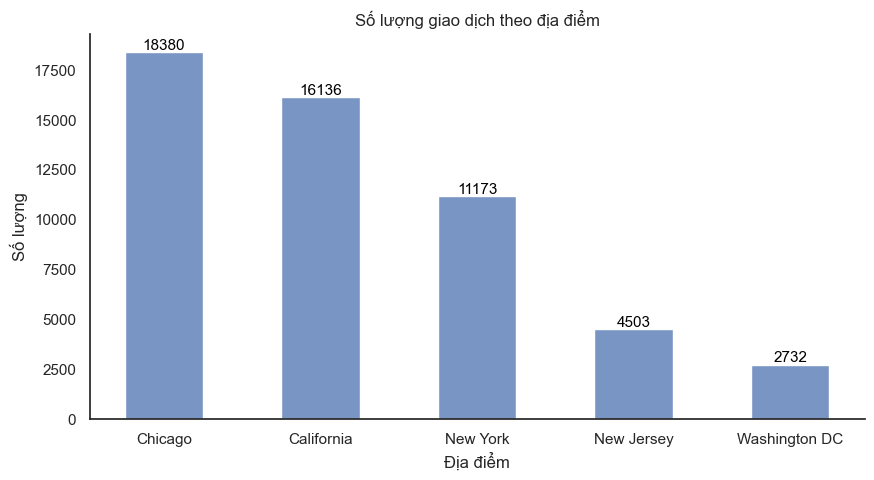

In [ ]:
# Số lượng giao dịch theo địa điểm
plt.figure(figsize=(10, 5))

# Tạo bảng màu tùy chỉnh
colors = sns.color_palette("ch:2.5,-.2,dark=.3", n_colors=len(shop_cleaned['Location'].unique()))

sns.histplot(shop_cleaned['Location'], shrink=.5, palette=colors)

sns.despine()
plt.title('Số lượng giao dịch theo địa điểm')
plt.xlabel('Địa điểm')
plt.ylabel('Số lượng')

for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.0f}",
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.show()

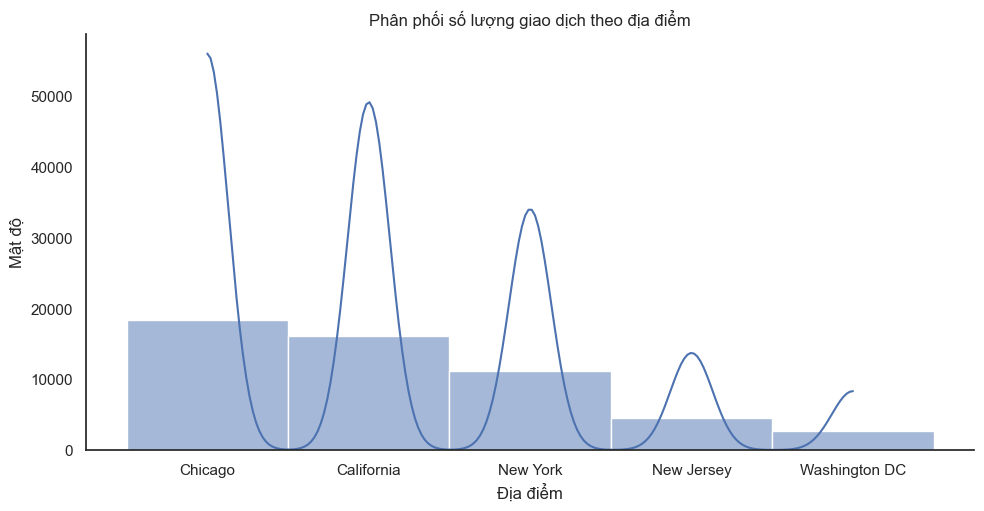

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(data=shop_cleaned, x='Location', kde=True, height=5, aspect=2) # kde=True để vẽ đường cong KDE

plt.title('Phân phối số lượng giao dịch theo địa điểm')
plt.xlabel('Địa điểm')
plt.ylabel('Mật độ')

plt.show()

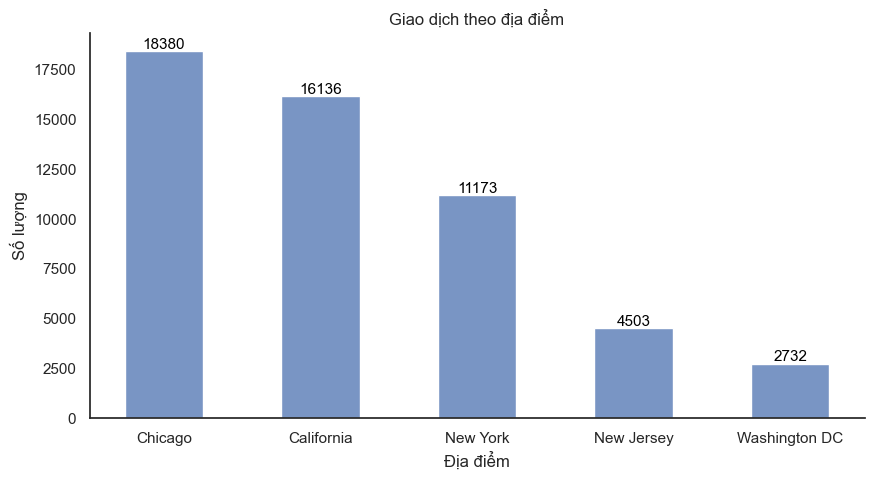

In [177]:
import pandas as pd

location_counts = shop_cleaned['Location'].value_counts()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Tính số lượng giao dịch cho mỗi địa điểm
location_counts = shop_cleaned['Location'].value_counts()

# Tạo bảng màu dựa trên số lượng giao dịch
colors = sns.color_palette("viridis", n_colors=len(location_counts))
color_map = dict(zip(location_counts.index, colors))
location_colors = shop_cleaned['Location'].map(color_map)

sns.histplot(shop_cleaned['Location'], shrink=.5, palette=location_colors)

sns.despine()
plt.title('Giao dịch theo địa điểm')
plt.xlabel('Địa điểm')
plt.ylabel('Số lượng')

for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.0f}",
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.show()

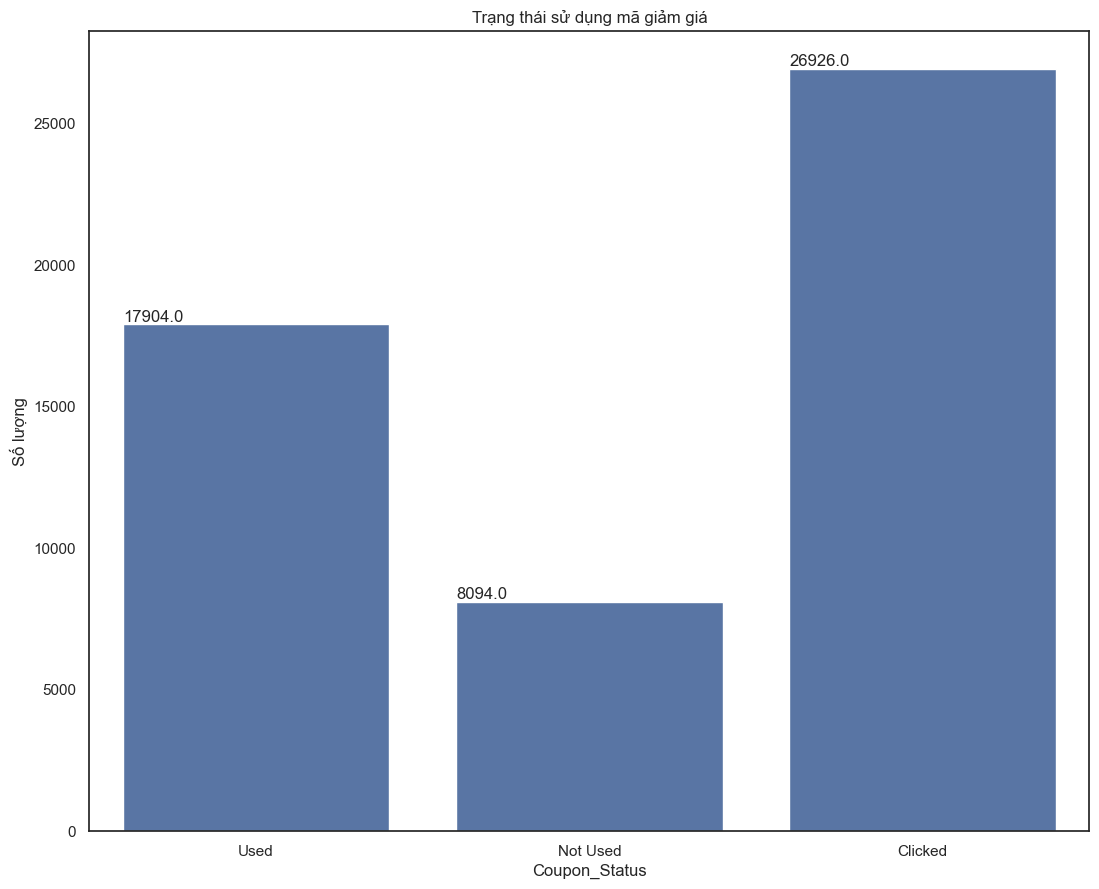

In [171]:
fig = plt.figure()
axis = fig.add_axes([1, 1, 1, 1])

# Truyền DataFrame và chỉ định cột 'Coupon_Status' cho x
sb.countplot(data=data, x='Coupon_Status', ax=axis)

for i in axis.patches:
    axis.annotate(i.get_height(), (i.get_x(), i.get_height()), va='bottom', ha='left')

plt.ylabel('Số lượng')
plt.title('Trạng thái sử dụng mã giảm giá')
plt.show() # Thêm plt.show() để hiển thị biểu đồ

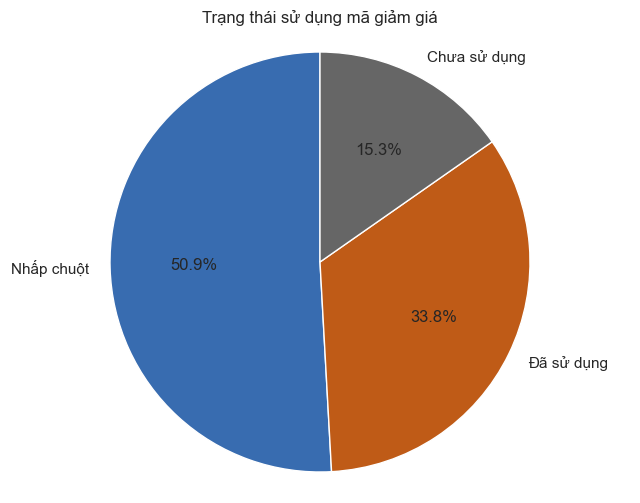

In [ ]:
# Trạng thái sử dụng mã giảm giá
# Lấy dữ liệu đếm các giá trị trong cột 'Coupon_Status'
status_counts = data['Coupon_Status'].value_counts()
labels=['Nhấp chuột','Đã sử dụng', 'Chưa sử dụng']
# Tạo biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(status_counts, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=[c1(0.5),c1(0.8),c1(0.9)])  # Tuỳ chọn màu sắc

plt.title('Trạng thái sử dụng mã giảm giá')
plt.axis('equal')  # Đảm bảo biểu đồ tròn hoàn hảo
plt.show()

In [ ]:
# Count the frequency of each Coupon Status
coupon_count = df_cleaned['Coupon_Status'].value_counts()


plt.figure(figsize=(8,8))
coupon_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(coupon_count)))
plt.title('Coupon Status Frequency', fontsize=14)

plt.ylabel('')  # Hide the y-label
plt.show()